# Sentimental Analysis Visualization

### Performing the sentimental analysis using vader and creating some data frames or future visualization

In [6]:
import numpy as np
import pandas as pd
from dataprep import clean_text
import nltk
import re
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.image as mpimg

stopwords = set({'legend','apex','legends'})
analyser = SentimentIntensityAnalyzer()
tweet_data = pd.read_csv("tweet_data_cleaned.csv")
scores = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []

for i in range(tweet_data['Text'].shape[0]):
    compound = analyser.polarity_scores(tweet_data['Text'][i])["compound"]
    pos = analyser.polarity_scores(tweet_data['Text'][i])["pos"]
    neu = analyser.polarity_scores(tweet_data['Text'][i])["neu"]
    neg = analyser.polarity_scores(tweet_data['Text'][i])["neg"]

    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
    
sentiments_score = pd.DataFrame.from_dict(scores)
tweet_data = tweet_data.join(sentiments_score)

listpositive = tweet_data[tweet_data['Compound'] >= 0.05] 
listnegative = tweet_data[tweet_data['Compound'] <= -0.05]
listneutral = tweet_data[tweet_data['Compound'].between(-0.05,0.05)]

HTpositive = tweet_data['Hashtags'][tweet_data['Compound'] >= 0.05]
HTnegative = tweet_data['Hashtags'][tweet_data['Compound'] <= -0.05]
HTneutral = tweet_data['Hashtags'][tweet_data['Compound'].between(-0.05,0.05)]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\solae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\solae\Desktop\Programing\Python\twitter_scrape\dataprep.py:57: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('[+-]?([0-9]*[.])?[0-9]+', ' ')
C:\Users\solae\Desktop\Programing\Python\twitter_scrape\dataprep.py:58: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace("[^\w'#\s]",' ')
C:\Users\solae\Desktop\Programing\Python\twitter_scrape\dataprep.py:59: FutureWarning: The default value of regex will change from True to False in a future version.
  text = text.str.replace('\s\s+', ' ')


## Tweet sentiment

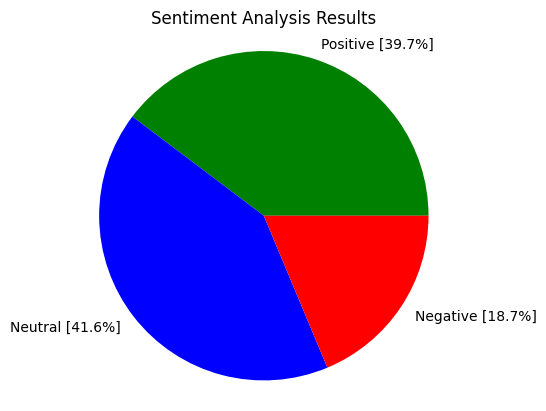

In [66]:
postivenum = len(listpositive.index)
negativenum = len(listnegative.index)
neutralnum = len(listneutral.index)
totalnum = postivenum + negativenum + neutralnum
postivepercent = (postivenum / totalnum)*100
negativepercent = (negativenum / totalnum)*100
neutralpercent = (neutralnum / totalnum)*100


sizes = [postivepercent, neutralpercent, negativepercent] 
names = ['Positive ['+str(round(postivepercent,1))+'%]' , 'Neutral ['+str(round(neutralpercent,1))+'%]','Negative ['+str(round(negativepercent,1))+'%]'] 
colors = ['yellowgreen', 'blue','red'] 
plt.pie(sizes, labels=names, colors=['green','blue','red']) 
plt.style.use('default') 
plt.title('Sentiment Analysis Results') 
plt.axis('equal') 
plt.show()

## A word cloud for all words

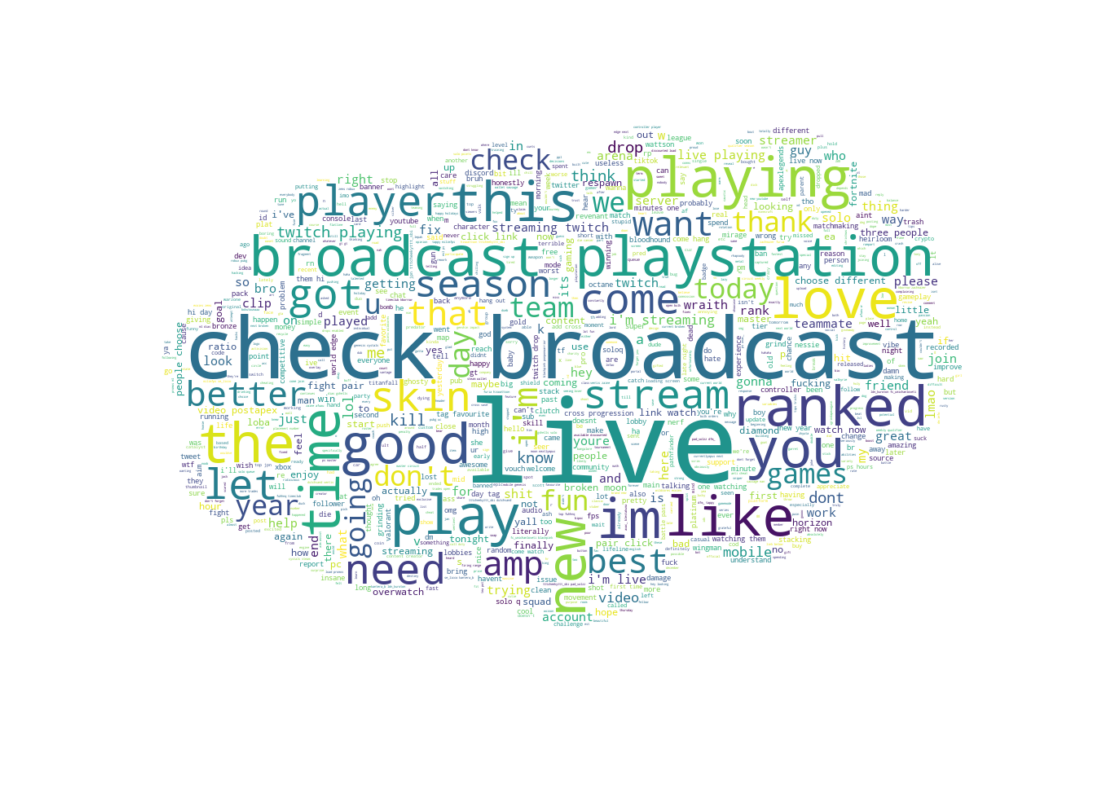

'\nstopwords = set({\'legend\',\'apex\',\'legends\',\'game\',"it","i"})\nallwords = \' \'.join([text for text in tweet_data[\'Unlemmatize\']])\nmask = np.array(Image.open("cloud.png")) \nwc = WordCloud(background_color="white", mask = mask,  stopwords=stopwords, max_words=1000,repeat=True).generate(str(allwords)) \nplt.figure(figsize=(15,10))\nplt.imshow(wc, interpolation=\'bilinear\')\nplt.axis("off")\nplt.show()'

In [139]:
def wordcloud(df,stopword):
    allwords = ' '.join([text for text in df])
    mask = np.array(Image.open("cloud.png")) 
    wc = WordCloud(background_color="white", mask = mask,  stopwords=stopwords, max_words=1000,repeat=True).generate(str(allwords))
    plt.figure(figsize=(15,10))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

stopwords = set({'legend','apex','legends','game',"it","i"})
wordcloud(tweet_data['Unlemmatize'], stopwords)

## A word cloud for positive tweets

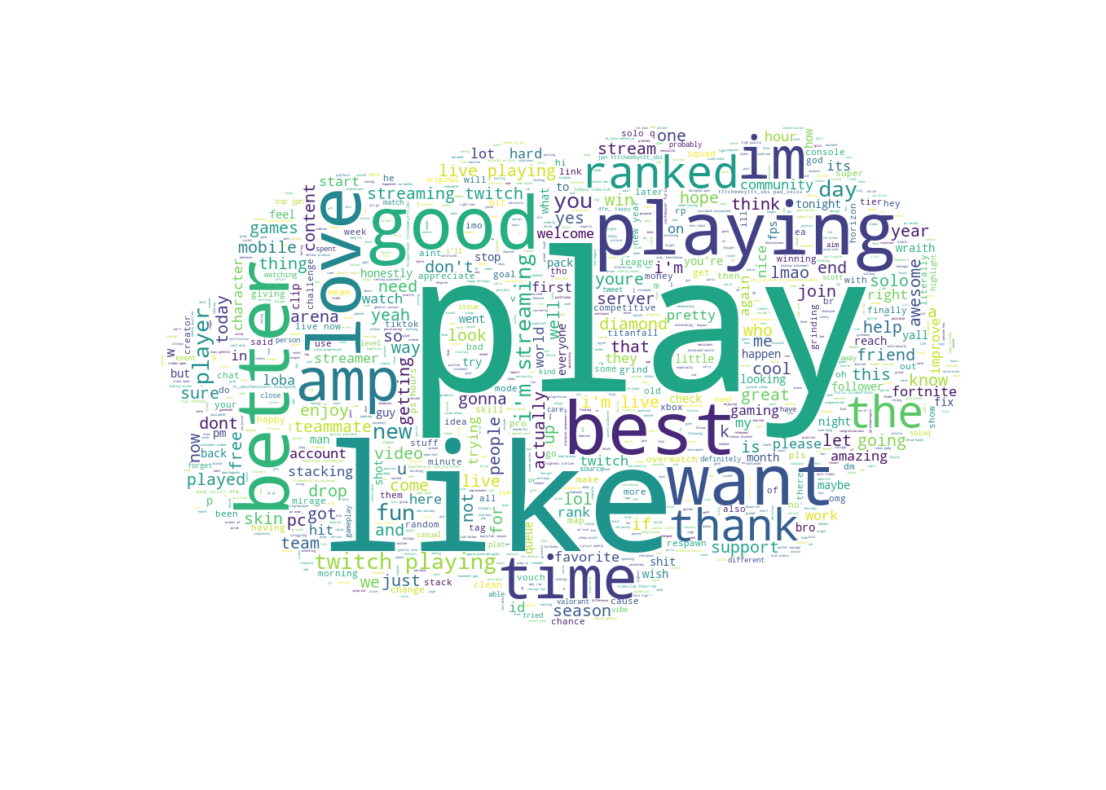

In [140]:
stopwords = set({'legend','apex','legends','game',"it","i"})
wordcloud(listpositive['Unlemmatize'], stopwords)

## A word cloud for negative tweets

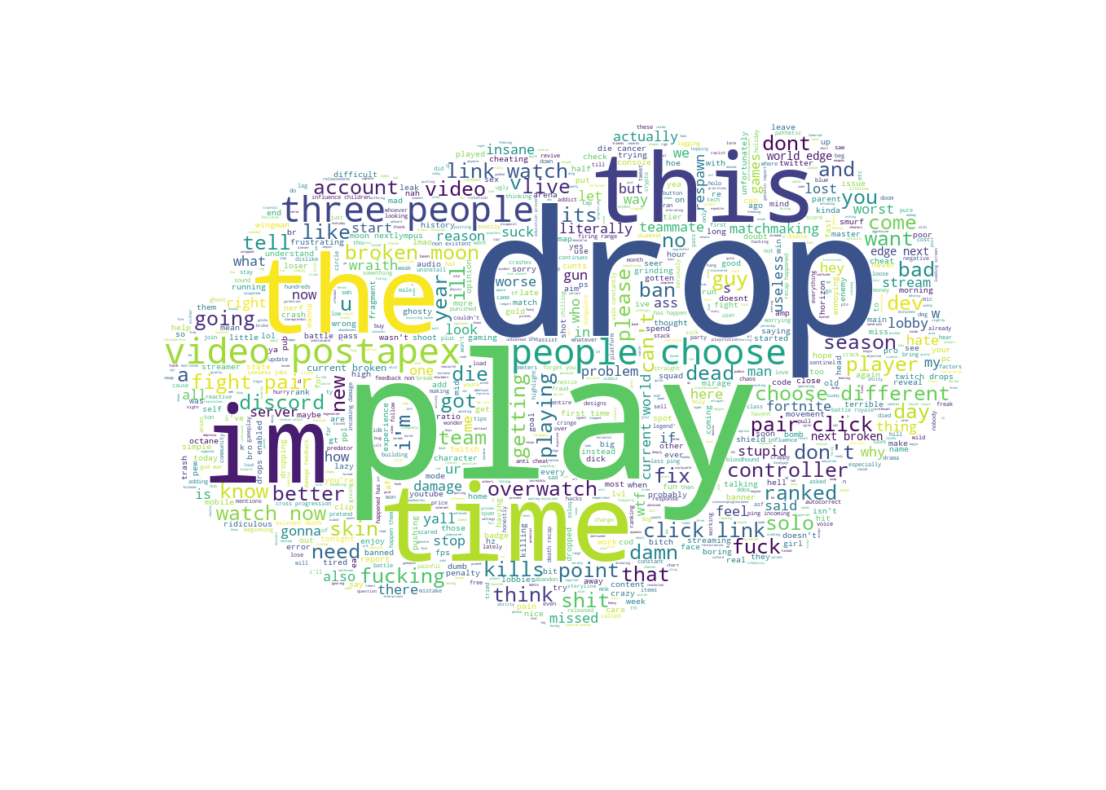

In [142]:
stopwords = set({'legend','apex','legends','game',"it","i","kill"})
wordcloud(listnegative['Unlemmatize'], stopwords)

## Word Count in a data frames sorted

In [136]:
def get_top_n_gram(corpus,ngram_range,n=None): 
 vec = CountVectorizer(ngram_range=ngram_range).fit(corpus) 
 bag_of_words = vec.transform(corpus) 
 sum_words = bag_of_words.sum(axis=0)  
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()] 
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True) 
 return words_freq[:n]

n1 = get_top_n_gram(tweet_data["Unlemmatize"],(1,1),(10))
n1df = pd.DataFrame(n1, columns=['words', 'count'])
print(n1df)

         words  count
0         apex   1012
1      legends    883
2         live    346
3        check    219
4         game    212
5    broadcast    182
6  playstation    181
7      playing    147
8         play    118
9           it    116


In [137]:
n2 = get_top_n_gram(tweet_data["Unlemmatize"],(2,2),10)
dfn2 = pd.DataFrame(n2, columns=['words', 'count'])
print(dfn2)

                   words  count
0           apex legends    796
1           legends live    196
2        check broadcast    180
3  broadcast playstation    178
4       playstation apex    177
5           playing apex     86
6         twitch playing     37
7       streaming twitch     32
8         streaming apex     31
9              play apex     29


In [138]:
n3 = get_top_n_gram(tweet_data["Unlemmatize"],(3,3),10)
dfn3 = pd.DataFrame(n3, columns=['words', 'count'])
print(dfn3)

                         words  count
0            apex legends live    195
1  check broadcast playstation    178
2   broadcast playstation apex    177
3     playstation apex legends    177
4         playing apex legends     79
5          twitch playing apex     35
6     streaming twitch playing     32
7       streaming apex legends     29
8           apex legends video     25
9          apex legends mobile     24


## Positive Hashtag

In [67]:
def hashtag_extract(df):
    hashtags = []
    df = df.dropna()
    for i in df:
        ht = re.findall(r"(\w+)", i)
        hashtags.append(ht)
    return hashtags

HT_positive = hashtag_extract(HTpositive)
HT_positive = sum(HT_positive,[])
hashcount = pd.value_counts(np.array(HT_positive))
print(hashcount.head(10))

ApexLegends      276
apexlegends       48
twitch            39
APEX              24
gaming            20
PS5Share          19
ApexLedgends      17
apex              17
Apex              15
smallstreamer     13
dtype: int64


## Negative Hashtag

In [20]:
HT_neg = hashtag_extract(HTnegative)
HT_neg = sum(HT_neg,[])
hashcount = pd.value_counts(np.array(HT_neg))
print(hashcount.head(10))

ApexLegends     117
apexlegends      26
Apex             14
PS5Share         12
マップローテーション       12
twitch           10
ApexLedgends      9
gaming            8
apex              8
respawn           7
dtype: int64
